<a href="https://colab.research.google.com/github/wesnasimone/IA901-Processamento_Imagens_Segmentacao/blob/main/Transformacao_de_intensidade/Ex03_225843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###########################################

          Nome: Wesna Simone Bulla de Araujo
          RA: 225843
          Curso: EA098/IA901

##########################################



# Ex03 - Transformações de Intensidade (operações radiométricas)

Esta atividade tem 2 objetivos principais:
  - entender o que são transformações radiométricas e como podem ser implementadas
  - explorar duas aplicações para as transformações radiométricas: normalização e segmentação.

## Parte 1 - Manipulando imagens

O código abaixo lê a imagem *flower.pgm* que está armazenada na pasta **P_IA901A_2023S1/IA901A_Ex03** utilizando a biblioteca PIL/pillow, apresenta a imagem na tela e a transforma num array numpy.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


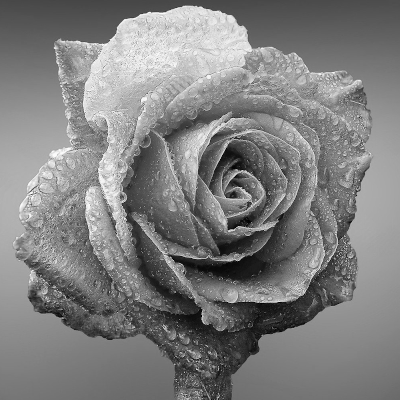

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img_file = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/flower.pgm"
img = Image.open(img_file)
display(img)

# Convertendo para um array do numpy
f=np.asarray(img)
print(f)

É bastante útil poder transformar Images em PIL em arrays numpy, e vice-versa. Isso permitirá que realizemos operações matriciais nas imagens e posteriormente possamos visualizar (e salvar em arquivos) as imagens processadas.

### Exercício 3.1.1

(a) Classifique a imagem como monocromática (binária, grayscale) ou multibanda (tentando identificar o padrão multibanda adotado). Descubra: qual a profundidade da imagem? Qual o maior e o menor valor de intensidade de pixel da imagem?


Shape:  (400, 400)
Maior valor:  253
Menor valor:  0
Bits:  uint8


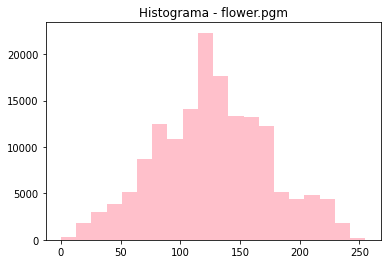

In [ ]:
#Imagem binária ou multibanda

#Plota histograma
h, bin_edges = np.histogram(f , 20, (0,255))
w=255./20
bin_centers = bin_edges[1:]-(w/2)
plt.bar(bin_centers, h, width=w, color='pink')
plt.title('Histograma - flower.pgm')

#Maior valor e menor valor de intensidade
maior_valor = np.max(f)
menor_valor = np.min(f)

# Resultados
print('Shape: ',np.shape(f)) #--> imagem grayscale, pois possui apenas um canal
print('Maior valor: ',maior_valor)
print('Menor valor: ',menor_valor)
print('Bits: ', f.dtype)

Através do histograma já seria possível identificar aproximadamente que o menor e o maior valor da imagem estariam perto de 0 e 250. No caso, os valores encontrados foram 0 e 253. Além disso, extraindo o tipo de dado tem-se que a imagem possui 8 bits (profundidade), o que resulta em 256 níveis. Dessa forma, considerando tais características é possível dizer que a imagem é monocromática. De fato, o shape da imagem possui apenas um canal.

(b) Leia a imagem *flower.pgm*, mostre na tela e transforme em um array numpy utilizando a biblioteca matplotlib.image. Exercite também o uso da barra de cores (colorbar).

Referência: [Tutorial Image Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html)

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


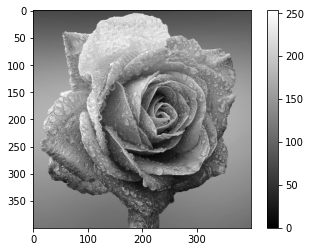

In [ ]:
#Lê imagem e já converte em array
imagem = mpimg.imread(img_file)
print(imagem)

#plota imagem
plt.imshow(imagem, cmap='gray')
plt.colorbar()


(c) Usando atributos do tipo [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) da biblioteca `PIL`, tente responder as mesmas perguntas do item (a).

In [ ]:
# Atributos da biblioteca Image
print('Modo: ', img.mode)
print('Shape: ',img.size)

Modo:  L
Shape:  (400, 400)


Utilizando em especial o atributo *mode* é possível verificar que a imagem é de fato monocromática, pois o **modo L** possui 8 bits (profundidade) nas cores branco e preto. Assim, devido a quantidade de 256 níveis é esperado que o menor e o maior valor estejam próximos de 0 e 255.

### Exercício 3.1.2

Imagine que eu ache que a imagem está um pouco clara demais e decido escurecê-la um pouco. Minha primeira ideia seria subtrair um valor de cada pixel, uma vez que valores menores correspondem a cores mais escuras.

[[235 235 235 ... 241 240 240]
 [236 235 236 ... 241 241 241]
 [236 236 237 ... 241 241 242]
 ...
 [ 25  24  23 ...  14  14  13]
 [ 23  22  22 ...  13  13  13]
 [ 23  23  22 ...  13  13  13]]


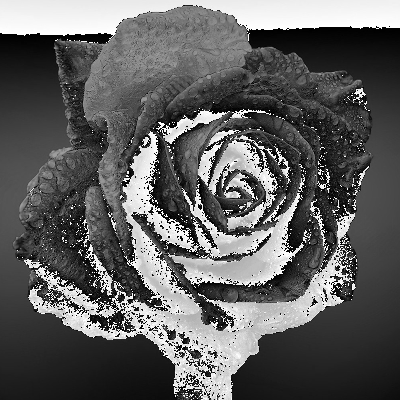

In [ ]:
# Vou escurecer a imagem, subtraindo um valor dos pixels do array f.
g=f-93
print(g)
# Agora vou transformar o array numa imagem PIL
g_img=Image.fromarray(g)
# E visualizar o resultado usando a função do PIL display
display(g_img)

(a) Porque a imagem ficou mais clara ao invés de mais escura? Explique porque ao subtrair um determinado valor de intensidade da imagem original algumas regiões da imagem ficaram saturadas em branco.

*RESPOSTA:*

O problema de saturação se deu por conta da subtração resultar em valores negativos (no caso dos valores menores que o valor a ser subtraído, ex: 72 - 93 = -21) e a variável que recebe o valor não ter a quantidade de bits necessária para armazená-lo. Dessa forma, ao invés de armazenar o próprio valor negativo uma outra representação é atribuida conforme a quantidade de bits disponíveis o que levou os valores negativos serem representados por números positivos e próximos a 255, por exemplo, -21 passou a ser representado por 235. Além disso, a imagem em questão é do tipo inteiro de 8 bits pegando a faixa de valores positivos, o que também justifica a não representação de valores negativos.


---
A principal mensagem é que podemos realizar operações quaisquer com os valores de pixel mas, no fim do dia, caso queiramos visualizar essas imagens, temos que pensar como esses valores serão mapeados para uma codificação que faça sentido no seu sistema computacional de apresentação.


(b) Tente refazer esta mesma operação de "escurecimento" da imagem através de subtração, sem que esse efeito de saturação aconteça.

In [ ]:
# Passo 1: a imagem foi transformada para o tipo inteiro (valores positivos e negativos) de 16 bits
# aumentar a quantidade de bits também melhora a qualidade da imagem
f1=np.asarray(img, dtype='int16')

# Passo 2: realizar novamente o processo de escurecimento por meio da subtração, mas utilizando a nova imagem
# Note que de fato agora os valores negativos foram armazenados na matriz
g1=f1-93
g1

array([[-21, -21, -21, ..., -15, -16, -16],
       [-20, -21, -20, ..., -15, -15, -15],
       [-20, -20, -19, ..., -15, -15, -14],
       ...,
       [ 25,  24,  23, ...,  14,  14,  13],
       [ 23,  22,  22, ...,  13,  13,  13],
       [ 23,  23,  22, ...,  13,  13,  13]], dtype=int16)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [25 24 23 ... 14 14 13]
 [23 22 22 ... 13 13 13]
 [23 23 22 ... 13 13 13]]


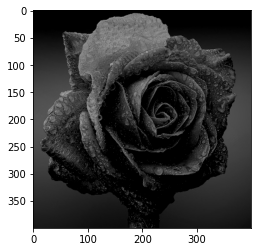

In [ ]:
# No entanto, as bibliotecas de visualização não representam bem os valores negativos. Assim,
# Passo 3: é necessário remapear os valores negativos para valores que façam mais sentido para o nosso sistema computacional
# Dessa forma, foram localizados todos os valores menores que zero e em seu lugar foram adicionados zeros, mantendo os outros valores
# da matriz intactos.
aux = g1 > 0            # cria matriz booleana para localizar os valores positivos (True/1) enquanto que os negativos serão False/0
g1_novo = g1 * aux      # multiplica a matriz booleana pela matriz original de modo que os valores falsos ao serem multiplicados pelos
                        # negativos irão resultar em zero e os valores verdadeiros ao serem multiplicados pelos valores positivos irão
                        # mante-los inalterados.
print(g1_novo)          # de fato, os valores negativos foram substituidos por zero

# Parte 4: Transforma o array em imagem PIL
g1_img=Image.fromarray(g1_novo)
plt.imshow(g1_img)

## Parte 2 - Transformação de Intensidade

Tranformações de intensidade ou transformações rediométricas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Para entender como isso é implementado na prática, estudem atentamente o tutorial sobre Transformada de intensidade ([tutorial](https://github.com/lrittner/Computacao-Visual/blob/master/master/tutorial_ti_2.ipynb)).




[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


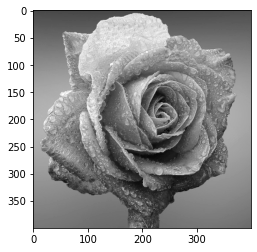

In [ ]:
print(f)
plt.imshow(f,cmap='gray')

Vamos exercitar a aplicação de um mapeamento f = T[f] a partir de uma função de transformação T. No nosso caso, a função T será o negativo da imagem.

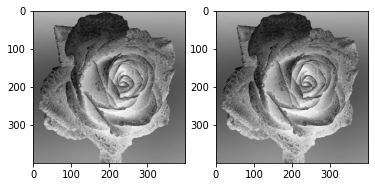

In [ ]:
T = np.arange(256).astype('uint8')        # função identidade
T1 = 255 - T                              # criando a função negação a partir da identidade
#print(T1)
T2 = np.arange(255,-1,-1).astype('uint8') # criando diretamente a função negação
#print(T2)

plt.subplot(1,2,1)
f1 = T1[f]
plt.imshow(f1,cmap='gray')
plt.subplot(1,2,2)
f2 = T2[f]
plt.imshow(f2,cmap='gray')


### Exercício 3.2.1

Utilize transformações radiométricas para transformar a imagem e identificar o número da placa do carro apresentado na imagem abaixo. Explique seu raciocínio para chegar na solução.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


float32


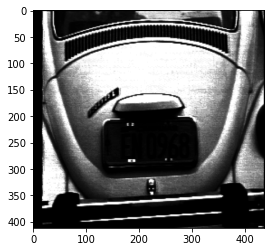

In [ ]:
f2 = mpimg.imread(path+'fusca.png')
plt.imshow(f2,cmap='gray')
print(f2.dtype)

Passo 1: um dos requisitos para fazer o uso de transformações radiométricas é que o indexador da função, no caso a própria imagem, seja formada apenas por valores inteiros. Dessa forma, foi realizado um mapeamento da imagem antiga que possui valores entre 0 - 1, para valores dentro da escala 0 - 255. Para isso, cada pixel da imagem anterior foi multiplicado por 255.
Em seguida, tendo a nova escala de valores a imagem foi convertida para o tipo int32 para que o novo mapeamento seja de fato formado apenas por inteiros positivos. Note que foi necessário fazer um mapeamento primeiro antes de converter o tipo da imagem, pois do contrário todos os valores seriam arredondados para zero (os valores decimais originais estão mais próximo de zero).

int32


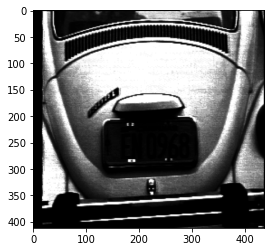

In [ ]:
# Converte matriz em inteiros --> remapeamente dos bits de 0 - 1 para 0-255
f2 = (f2*255).astype('int32')
plt.imshow(f2,cmap='gray')
print(f2.dtype)

Passo 2: tendo em mãos a nova representação de imagens por inteiros é possível aplicar as transformações radiométricas. Assim, observando a imagem obtida (semelhante a imagem original) percebe-se que seria interessante clarear o que está mais escuro, como é o caso da placa, e o que está mais claro deixar mais escuro. Tal comportamento se assemelha muito a uma imagem negativa. No entanto, tal método acaba deixando a placa muito clara impossibilitando sua leitura. Com isso, uma outra alternativa foi pegar a transformação negativa e quantiza-la em 255 níveis de modo a formar um vetor com um único 1 na posição zero e o restante das posições com valores nulos. Dessa forma, o primeiro valor do vetor imagem é zero que irá corresponder ao indice zero da função de transformação que tem nessa posição o valor 1. Logo, preto vira branco. E todos os outros indices da imagem diferentes de zero irão ser mapeados para zero, de modo que boa parte da imagem se torne preta e apenas alguns detalhes fiquem brancos, o que torna possível a identificação do número da placa.


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


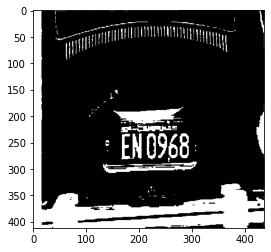

In [ ]:
#Transformação Radiométrica --> quantização e negativo
T3 = (T1//255)                  # Quantização usando o mapeamento negativo (T1)
print(T3)                       #

f3 = T3[f2]                     # Transformação Radiométrica
plt.imshow(f3, cmap='gray')

### Exercício 3.2.2

Uma das possíveis aplicações das transformações radiométricas é a segmentação de imagens, onde destacamos um objeto de interesse dos demais objetos (ou do fundo).

(a) A imagem abaixo mostra duas bolachas. Escolha um valor de limiar (threshold) para separar a bolacha do fundo da imagem. Crie uma função de transformação T e aplique esta transformação para obter os objetos de interesse (bolachas) pintados de branco e o fundo em preto.

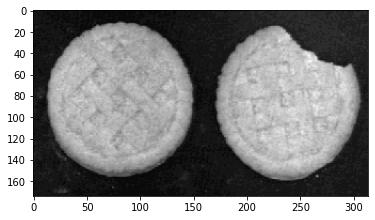

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
file_c = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/cookies.pgm"
plt.subplot(111)
f = mpimg.imread(file_c)
plt.imshow(f,cmap='gray')

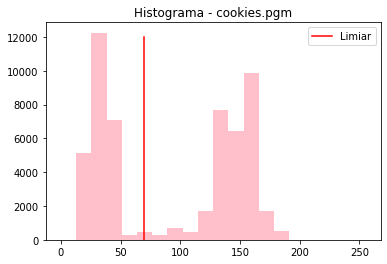

In [ ]:
# Plota histograma para visualizar a possível região de separação (limiar)
h, bin_edges = np.histogram(f , 20, (0,255))
w=255./20
bin_centers = bin_edges[1:]-(w/2)
y_limiar = np.arange(0, 12001, 2000)
x_limiar = np.ones(len(y_limiar))*70

plt.title('Histograma - cookies.pgm')
plt.bar(bin_centers, h, width=w, color='pink')
plt.plot(x_limiar,y_limiar,color='r', label = 'Limiar')
plt.legend()

Como observado pelo histograma definiu-se um limiar em 70, pois visualmente parece separar bem as duas regiões. Além disso, é possível concluir que as barras a direita do limiar representam as bolachas (mais brilho) enquanto que as barras da esquerda representam o fundo (menos brilho). Por isso, foi definido que valores acima do limiar receberiam o valor 1 (segamentar em branco as bolachas) e para valores abaixo do limiar receberiam zero (fundo preto).

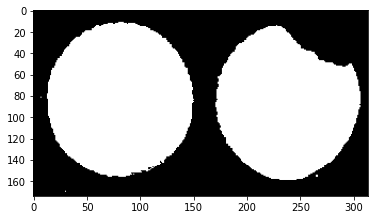

In [ ]:
# Função de tranformação radiométrica --> limiarização
T4 = (T > 70)                   # Define um limiar em 70: para valores acima de 70 o mapeamento converte para 1 e
                                # para valores abaixo do limiar o mapeamento converte para 0
f4 = T4[f]                      # aplica a transformação na imagem

# Plota o resultando da segmentação das bolachas
plt.imshow(f4,cmap='gray')

De fato, as bolachas foram segmentadas.

### Exercício 3.2.3

Leia a apresente a imagem `orquideafeec-calua.jpg`. Execute processamentos de intensidade nas diferentes bandas da imagem (R, G, B) e apresente o resultado. É possível segmentar a flor da orquídea usando uma única banda de cor?

Dica: exemplos disponíveis em [Applying point transforms e Processing individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement)

In [ ]:
from PIL import Image

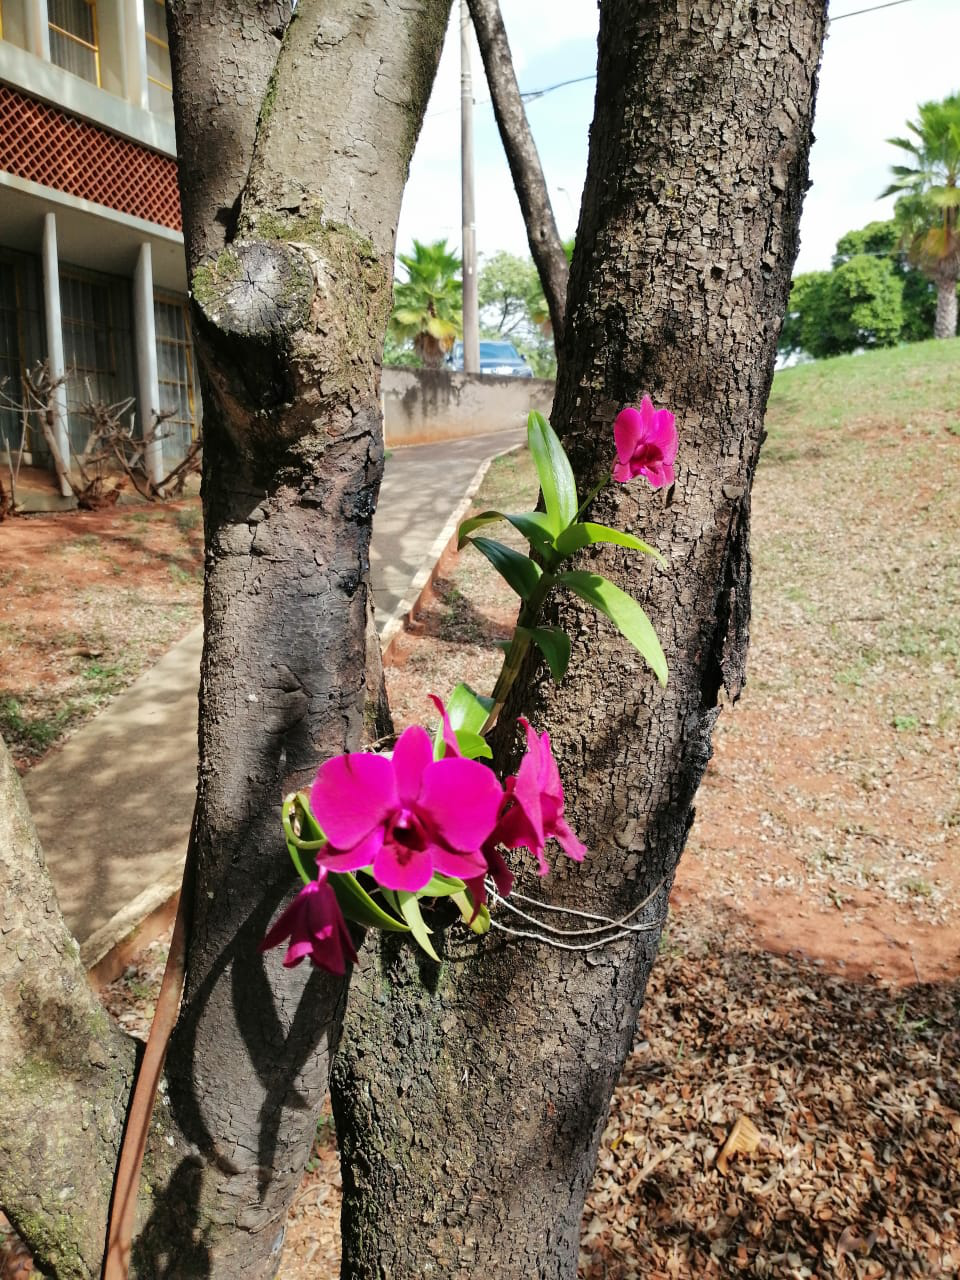

In [ ]:
img = Image.open(path+"/orquideafeec-calua.jpeg")
img

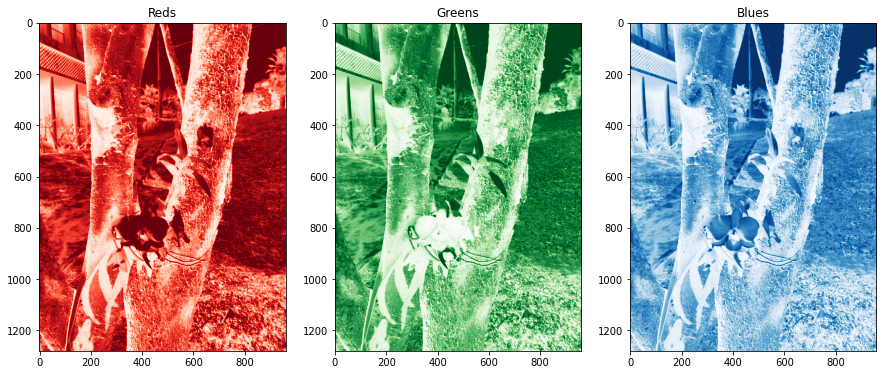

In [ ]:
# Divide as bandas da imagem RGB
source = img.split()
R, G, B = 0, 1, 2

# Cada pixel de cada banda é multiplicado por 1.2 --> aumentando o brilho
red = source[R].point(lambda i: i*1.2)
green = source[G].point(lambda i: i*1.2)
blue = source[B].point(lambda i: i*1.2)

# Plota os resultados para cada banda
bandas = [red, green, blue]
titulos = ['Reds', 'Greens', 'Blues']
figura = plt.figure(figsize=(15,10))
for c in range(3):
  a = figura.add_subplot(1,3,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(bandas[c], cmap=titulos[c])
plt.show()

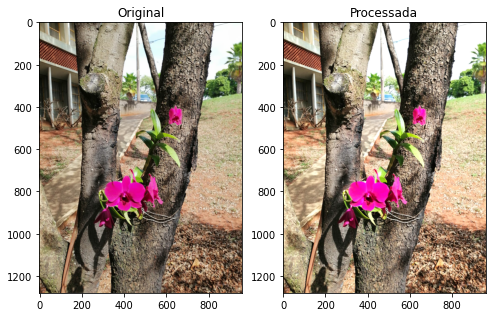

In [ ]:
# Reagrupa todas as bandas novamente para formar uma imagem RGB
im = Image.merge(img.mode, (red, green, blue))

# Compara a imagem original com a imagem processada
imagens = [img, im]
titulos = ['Original', 'Processada']
figura = plt.figure(figsize=(8,5))
for c in range(2):
  a = figura.add_subplot(1,2,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(imagens[c])
plt.show()

Note que a imagem processada ganhou um pouco mais de luz quando comparada a imagem original. A seguir foram plotados os histogramas de cada banda para analisar a transformação por limiarização para verificar se é possível segmentar a flor com apenas uma banda.

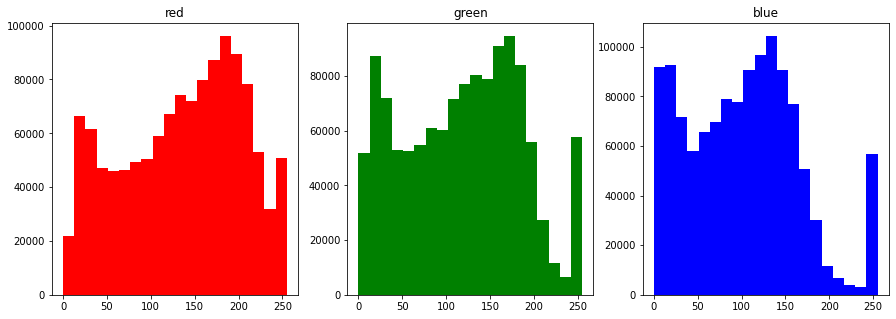

In [ ]:
# Plota histogramas para cada banda
titulos = ['red', 'green', 'blue']
figura = plt.figure(figsize=(15,5))
for c in range(3):
  a = figura.add_subplot(1,3,c+1)
  a.title.set_text(titulos[c])
  h, bin_edges = np.histogram(source[c], 20, (0,255))
  w=255./20
  bin_centers = bin_edges[1:]-(w/2)
  plt.bar(bin_centers, h, width=w, color = titulos[c])
plt.show()

Diferentemente do histograma da questão anterior que havia uma separação mais nítida entre as partes do histograma, isso não acontece aqui visto que há distriuição de valores significativos em toda faixa. Dessa forma, como a tonalidade da flor possui mais pigmentação vermelha optou-se por utilizar a banda R para a etapa de segmentação. Com alguns ajustes chegou-se no limiar de 220.

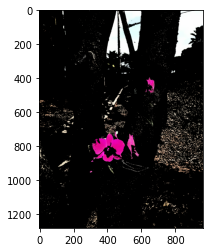

In [ ]:
# Função de tranformação radiométrica --> limiarização
T5 = T > 220                      # Define um limiar em 220: para valores acima de 220 o mapeamento converte para 1 e
                                  # para valores abaixo do limiar o mapeamento converte para 0
banda_r = T5[source[R]]           # aplica a transformação na imagem
img1=np.asarray(img)              # tranforma banda em array

# multiplica cada banda original da imagem pela banda R processada
imagem = []
for c in range(3):
  aux = img1[:,:,c]*banda_r
  r_img=Image.fromarray(aux)
  imagem.append(r_img)

# Reagrupa todas as bandas novamente para formar uma imagem RGB
im = Image.merge(img.mode, (imagem[0], imagem[1], imagem[2]))
plt.imshow(im)

Embora com essa limiarização a flor tenha se destacado na imagem ainda é possível visualizar algumas partes do cenário, como o contorno da árvore, resquícios da grama e o fundo branco. Dessa forma, pode-se dizer que é possível segmentar uma imagem utilizando apenas uma banda com o porém de que haverá muito provavelmente vestígios de outros objetos da cena.